## UNet with ResNet encoder  and decoder responding to VGG11  trained on 1020 images (256, 256) and 5 labeled anatomical stuctures.  

In [1]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from models.UNet2 import *

In [3]:
images = np.load("/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES/imgs16_half.npy")
labels = np.load("/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES/masks16_half.npy")


N = images.shape[0]
W = images.shape[1]
H = images.shape[2]
C = labels.shape[3]

In [4]:
x_train, x_test_valid, y_train, y_test_valid = train_test_split(images, labels, test_size=0.4, random_state=4)
x_valid, x_test, y_valid, y_test = train_test_split(x_test_valid, y_test_valid, test_size=0.5, random_state=4)

print(x_train.shape, y_train.shape)

(1020, 256, 256, 1) (1020, 256, 256, 5)


In [6]:
concate_layers_name = ['conv4_block6_out', 'conv3_block4_out', 'conv2_block3_out', 'conv1_relu', 'input_1']
resnet50_model = tf.keras.applications.ResNet50(include_top=True, input_shape=(256, 256, 1), classes=5, weights=None)

seg_model = UNet2(img_shape = (256, 256, 1), num_of_class = 5, vgg=11, concat_layers = concate_layers_name, loaded_model=resnet50_model,  learning_rate = 2e-4)


In [5]:
seg_model.build_decoder()

KerasTensor(type_spec=TensorSpec(shape=(None, 16, 16, 1024), dtype=tf.float32, name=None), name='conv4_block6_out/Relu:0', description="created by layer 'conv4_block6_out'")
KerasTensor(type_spec=TensorSpec(shape=(None, 32, 32, 512), dtype=tf.float32, name=None), name='conv3_block4_out/Relu:0', description="created by layer 'conv3_block4_out'")
KerasTensor(type_spec=TensorSpec(shape=(None, 64, 64, 256), dtype=tf.float32, name=None), name='conv2_block3_out/Relu:0', description="created by layer 'conv2_block3_out'")
KerasTensor(type_spec=TensorSpec(shape=(None, 128, 128, 64), dtype=tf.float32, name=None), name='conv1_relu/Relu:0', description="created by layer 'conv1_relu'")
KerasTensor(type_spec=TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [6]:
seg_model.model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 3200        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [7]:
history = seg_model.train(x_train, y_train, x_valid, y_valid, epoch = 100, batch_size = 8)

Epoch 1/100
128/128 [==============================] - 1625s 13s/step - loss: 6.9429 - dice_coef_multilabel: 0.0188 - iou_multilabel: 0.0097 - val_loss: 1.2359 - val_dice_coef_multilabel: 0.0260 - val_iou_multilabel: 0.0135
INFO:tensorflow:Assets written to: saved_models/UNet_model2/assets
Epoch 2/100
128/128 [==============================] - 1623s 13s/step - loss: 0.2239 - dice_coef_multilabel: 0.1167 - iou_multilabel: 0.0697 - val_loss: 0.2464 - val_dice_coef_multilabel: 0.2145 - val_iou_multilabel: 0.1380
INFO:tensorflow:Assets written to: saved_models/UNet_model2/assets
Epoch 3/100
128/128 [==============================] - 1494s 12s/step - loss: 0.0785 - dice_coef_multilabel: 0.3723 - iou_multilabel: 0.2981 - val_loss: 0.1424 - val_dice_coef_multilabel: 0.2252 - val_iou_multilabel: 0.1575
INFO:tensorflow:Assets written to: saved_models/UNet_model2/assets
Epoch 4/100
128/128 [==============================] - 1499s 12s/step - loss: 0.0781 - dice_coef_multilabel: 0.3858 - iou_multi

Epoch 32/100
128/128 [==============================] - 1504s 12s/step - loss: 0.0046 - dice_coef_multilabel: 0.7918 - iou_multilabel: 0.7113 - val_loss: 0.0060 - val_dice_coef_multilabel: 0.6932 - val_iou_multilabel: 0.6110
Epoch 33/100
128/128 [==============================] - 1502s 12s/step - loss: 0.0047 - dice_coef_multilabel: 0.7932 - iou_multilabel: 0.7112 - val_loss: 0.0045 - val_dice_coef_multilabel: 0.7748 - val_iou_multilabel: 0.6952
INFO:tensorflow:Assets written to: saved_models/UNet_model2/assets
Epoch 34/100
128/128 [==============================] - 1501s 12s/step - loss: 0.0042 - dice_coef_multilabel: 0.8163 - iou_multilabel: 0.7353 - val_loss: 0.0043 - val_dice_coef_multilabel: 0.7824 - val_iou_multilabel: 0.6966
INFO:tensorflow:Assets written to: saved_models/UNet_model2/assets
Epoch 35/100
128/128 [==============================] - 1498s 12s/step - loss: 0.0037 - dice_coef_multilabel: 0.8203 - iou_multilabel: 0.7411 - val_loss: 0.0037 - val_dice_coef_multilabel: 0.

KeyboardInterrupt: 

In [12]:
loaded_model = tf.keras.models.load_model('saved_models/UNet_model2', custom_objects={"dice_coef_multilabel": dice_coef_multilabel, "iou_multilabel": iou_multilabel})

preds_train = loaded_model.predict(x_train)
print("TRAIN DICE_COEF: ", dice_coef_multilabel(y_train.astype('float32'), preds_train).numpy())
print("TRAIN IoU: ", iou_multilabel(y_train.astype('float32'), preds_train, 5).numpy())

preds_test = loaded_model.predict(x_test)
print("TEST DICE_COEF: ", dice_coef_multilabel(y_test.astype('float32'), preds_test).numpy())
print("TEST IoU: ", iou_multilabel(y_test.astype('float32'), preds_test, 1).numpy())

TRAIN DICE_COEF:  0.9328901
TRAIN IoU:  0.879694
TEST DICE_COEF:  0.8980061
TEST IoU:  0.757257


In [9]:
print("TEST DICE_COEF, IOU Spinal cord: ", dice_coef(y_test.astype('float32')[:, :, :, 0], preds_test[:, :, :, 0]).numpy(), iou(y_test.astype('float32')[:, :, :, 0], preds_test[:, :, :, 0]).numpy())
print("TEST DICE_COEF, IOU Left lung: ", dice_coef(y_test.astype('float32')[:, :, :, 1], preds_test[:, :, :, 1]).numpy(), iou(y_test.astype('float32')[:, :, :, 1], preds_test[:, :, :, 1]).numpy())
print("TEST DICE_COEF, IOU Right lung: ", dice_coef(y_test.astype('float32')[:, :, :, 2], preds_test[:, :, :, 2]).numpy(), iou(y_test.astype('float32')[:, :, :, 2], preds_test[:, :, :, 2]).numpy())
print("TEST DICE_COEF, IOU Heart: ", dice_coef(y_test.astype('float32')[:, :, :, 3], preds_test[:, :, :, 3]).numpy(), iou(y_test.astype('float32')[:, :, :, 3], preds_test[:, :, :, 3]).numpy())
print("TEST DICE_COEF, IOU Esophagus: ", dice_coef(y_test.astype('float32')[:, :, :, 4], preds_test[:, :, :, 4]).numpy(), iou(y_test.astype('float32')[:, :, :, 4], preds_test[:, :, :, 4]).numpy())

TEST DICE_COEF, IOU Spinal cord:  0.86186254 0.757257
TEST DICE_COEF, IOU Left lung:  0.9761333 0.9533793
TEST DICE_COEF, IOU Right lung:  0.97736007 0.9557226
TEST DICE_COEF, IOU Heart:  0.93465686 0.8773294
TEST DICE_COEF, IOU Esophagus:  0.7400178 0.58732396


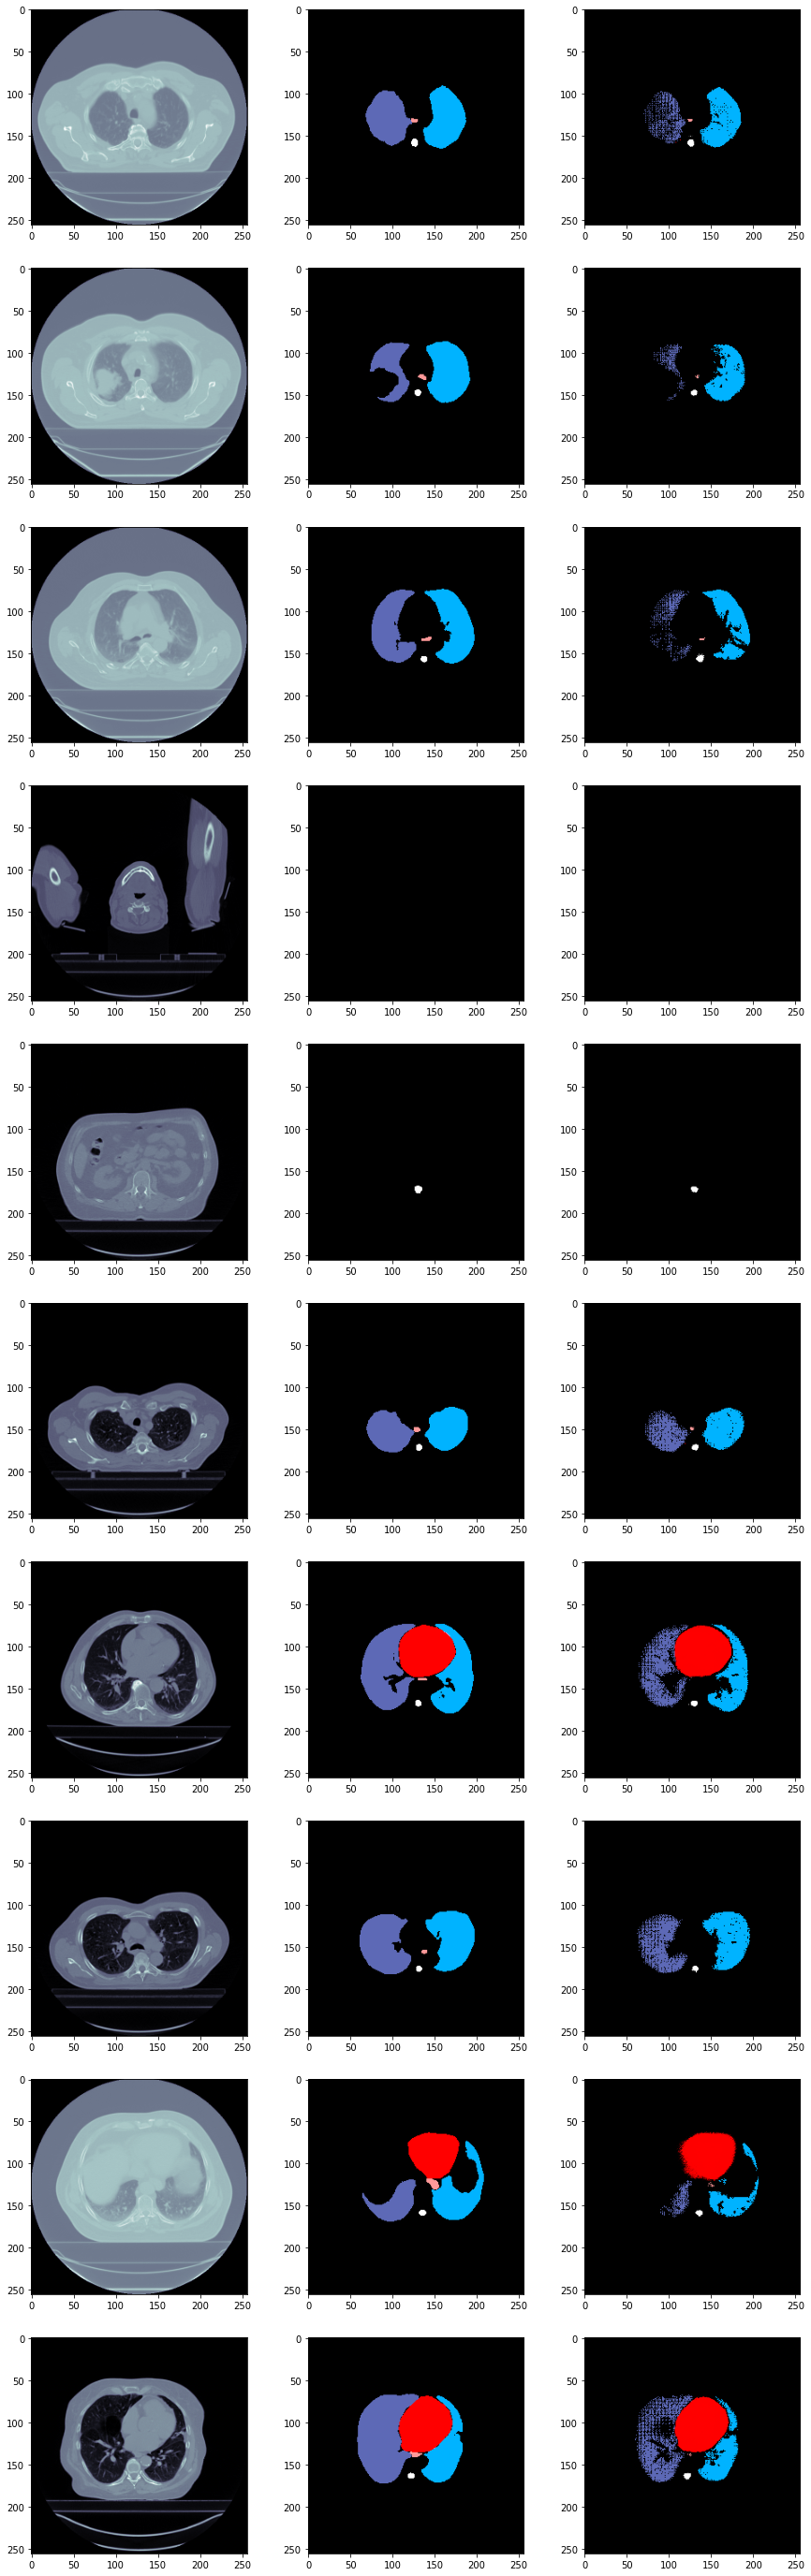

In [14]:
show_imgs(10, x_test[10:30], y_test[10:30], preds_test[10:30])

## UNet with ResNet encoder  and decoder responding to VGG13  trained on 1020 images (256, 256) and 5 labeled anatomical stuctures.  

In [5]:
concate_layers_name = ['conv4_block6_out', 'conv3_block4_out', 'conv2_block3_out', 'conv1_relu', 'input_1']
resnet50_model = tf.keras.applications.ResNet50(include_top=True, input_shape=(256, 256, 1), classes=5, weights=None)



In [6]:
seg_model = UNet2(img_shape = (256, 256, 1), num_of_class = 5, vgg=13, path="UNet_VGG13decoder_ResnetEncoder", concat_layers = concate_layers_name, loaded_model=resnet50_model,  learning_rate = 2e-4)
seg_model.build_decoder()

KerasTensor(type_spec=TensorSpec(shape=(None, 16, 16, 1024), dtype=tf.float32, name=None), name='conv4_block6_out/Relu:0', description="created by layer 'conv4_block6_out'")
KerasTensor(type_spec=TensorSpec(shape=(None, 32, 32, 512), dtype=tf.float32, name=None), name='conv3_block4_out/Relu:0', description="created by layer 'conv3_block4_out'")
KerasTensor(type_spec=TensorSpec(shape=(None, 64, 64, 256), dtype=tf.float32, name=None), name='conv2_block3_out/Relu:0', description="created by layer 'conv2_block3_out'")
KerasTensor(type_spec=TensorSpec(shape=(None, 128, 128, 64), dtype=tf.float32, name=None), name='conv1_relu/Relu:0', description="created by layer 'conv1_relu'")
KerasTensor(type_spec=TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [7]:
history = seg_model.train(x_train, y_train, x_valid, y_valid, epoch = 100, batch_size = 8)

Epoch 1/100
128/128 [==============================] - 1746s 14s/step - loss: 0.9403 - dice_coef_multilabel: 0.0459 - iou_multilabel: 0.0262 - val_loss: 0.4083 - val_dice_coef_multilabel: 0.0496 - val_iou_multilabel: 0.0263
INFO:tensorflow:Assets written to: UNet_VGG13decoder_ResnetEncoder/assets
Epoch 2/100
128/128 [==============================] - 1655s 13s/step - loss: 0.1053 - dice_coef_multilabel: 0.2086 - iou_multilabel: 0.1405 - val_loss: 0.0837 - val_dice_coef_multilabel: 0.2392 - val_iou_multilabel: 0.1727
INFO:tensorflow:Assets written to: UNet_VGG13decoder_ResnetEncoder/assets
Epoch 3/100
128/128 [==============================] - 1657s 13s/step - loss: 0.0369 - dice_coef_multilabel: 0.4074 - iou_multilabel: 0.3566 - val_loss: 0.0899 - val_dice_coef_multilabel: 0.4013 - val_iou_multilabel: 0.3518
INFO:tensorflow:Assets written to: UNet_VGG13decoder_ResnetEncoder/assets
Epoch 4/100
128/128 [==============================] - 1659s 13s/step - loss: 0.0209 - dice_coef_multilabe

Epoch 32/100
128/128 [==============================] - 1664s 13s/step - loss: 0.0023 - dice_coef_multilabel: 0.8079 - iou_multilabel: 0.7298 - val_loss: 0.0026 - val_dice_coef_multilabel: 0.7750 - val_iou_multilabel: 0.6947
INFO:tensorflow:Assets written to: UNet_VGG13decoder_ResnetEncoder/assets
Epoch 33/100
128/128 [==============================] - 1664s 13s/step - loss: 0.0033 - dice_coef_multilabel: 0.8067 - iou_multilabel: 0.7297 - val_loss: 0.0354 - val_dice_coef_multilabel: 0.5602 - val_iou_multilabel: 0.4802
Epoch 34/100
128/128 [==============================] - 1663s 13s/step - loss: 0.0175 - dice_coef_multilabel: 0.6379 - iou_multilabel: 0.5557 - val_loss: 0.0085 - val_dice_coef_multilabel: 0.6591 - val_iou_multilabel: 0.5646
Epoch 35/100
128/128 [==============================] - 1668s 13s/step - loss: 0.0048 - dice_coef_multilabel: 0.7684 - iou_multilabel: 0.6820 - val_loss: 0.0089 - val_dice_coef_multilabel: 0.6815 - val_iou_multilabel: 0.5925
Epoch 36/100
128/128 [====

KeyboardInterrupt: 

In [11]:
loaded_model = tf.keras.models.load_model('UNet_VGG13decoder_ResnetEncoder', custom_objects={"dice_coef_multilabel": dice_coef_multilabel, "iou_multilabel": iou_multilabel})

preds_train = loaded_model.predict(x_train)
print("TRAIN DICE_COEF: ", dice_coef_multilabel(y_train.astype('float32'), preds_train).numpy())
print("TRAIN IoU: ", iou_multilabel(y_train.astype('float32'), preds_train, 5).numpy())

preds_test = loaded_model.predict(x_test)
print("TEST DICE_COEF: ", dice_coef_multilabel(y_test.astype('float32'), preds_test).numpy())
print("TEST IoU: ", iou_multilabel(y_test.astype('float32'), preds_test, 1).numpy())

TRAIN DICE_COEF:  0.92585593
TRAIN IoU:  0.8692169
TEST DICE_COEF:  0.8986791
TEST IoU:  0.7828246


In [5]:
loaded_model = tf.keras.models.load_model('UNet_VGG13decoder_ResnetEncoder', custom_objects={"dice_coef_multilabel": dice_coef_multilabel, "iou_multilabel": iou_multilabel})

preds_test = loaded_model.predict(x_test)
print("TEST DICE_COEF: ", dice_coef_multilabel(y_test.astype('float32'), preds_test).numpy())
print("TEST IoU: ", iou_multilabel(y_test.astype('float32'), preds_test, 1).numpy())

TEST DICE_COEF:  0.8781847
TEST IoU:  0.7828246


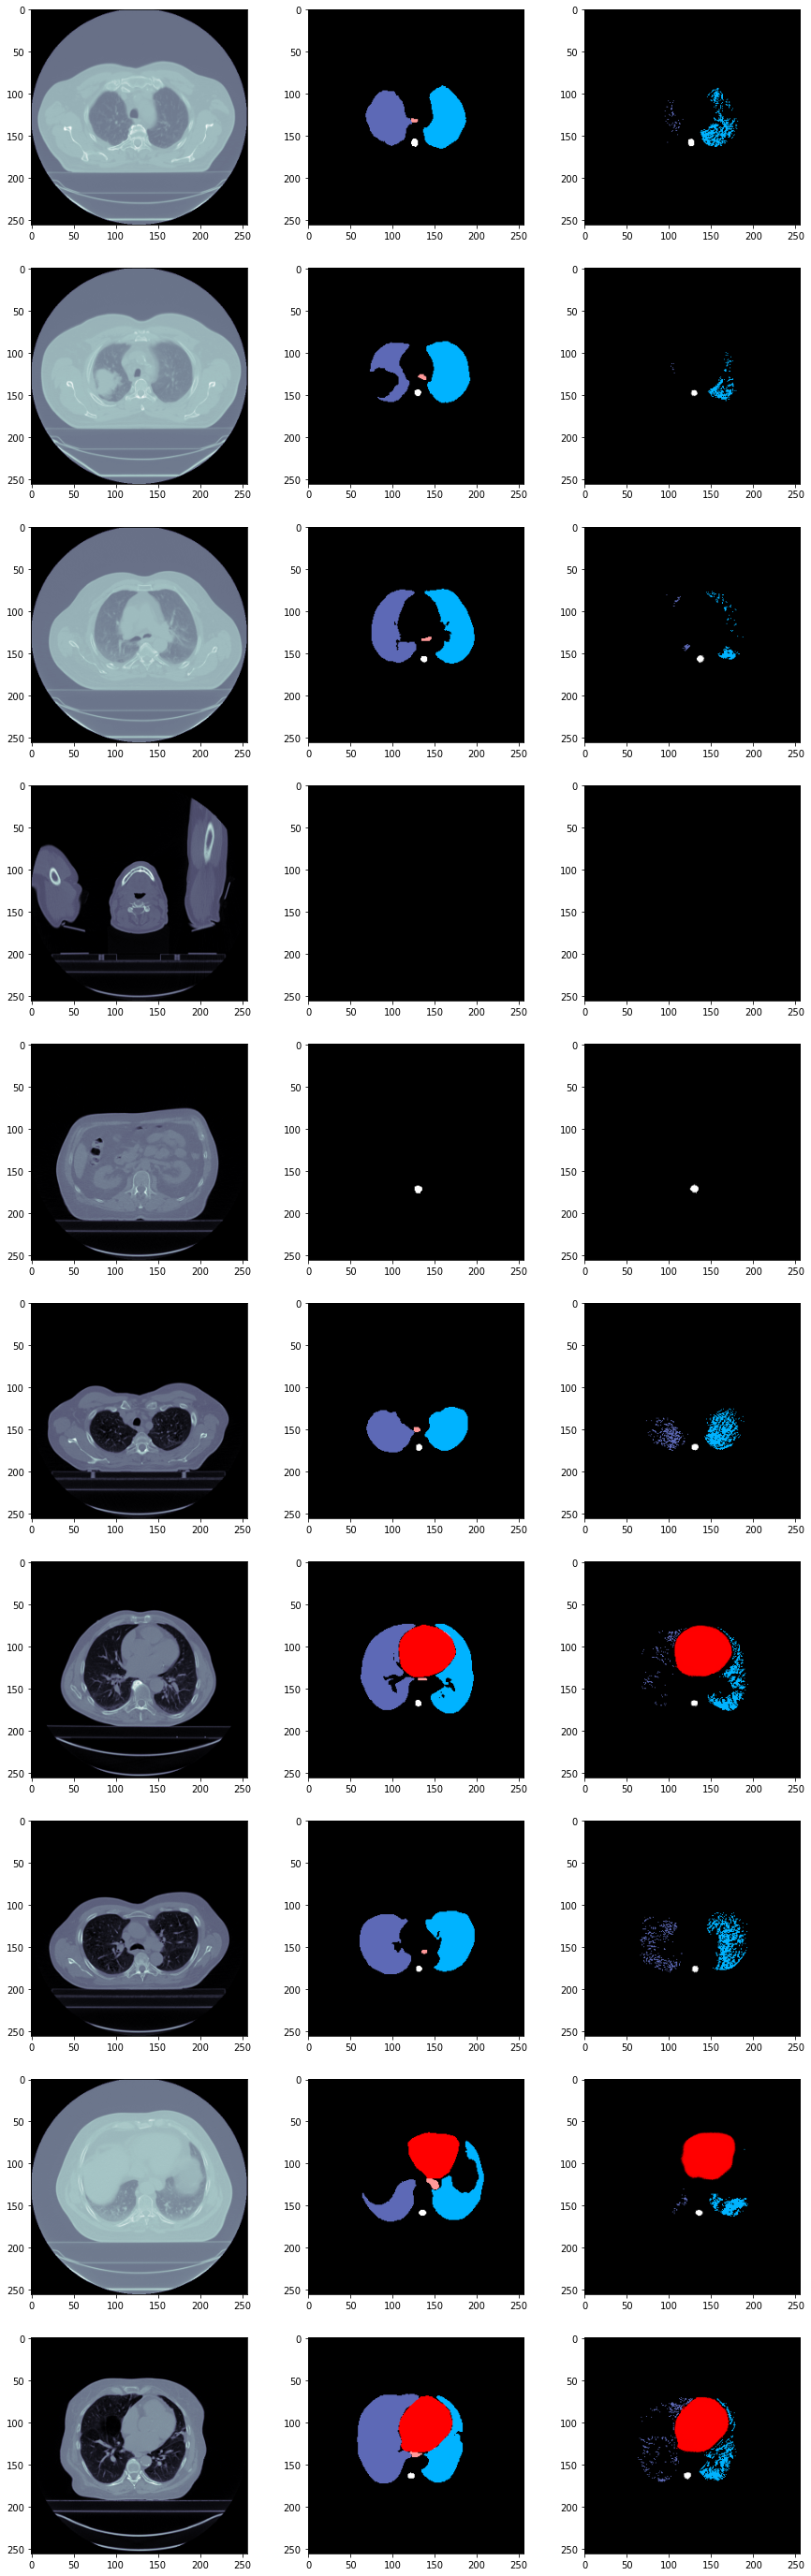

In [6]:
show_imgs(10, x_test[10:30], y_test[10:30], preds_test[10:30])

In [13]:
print("TEST DICE_COEF, IOU Spinal cord: ", dice_coef(y_test.astype('float32')[:, :, :, 0], preds_test[:, :, :, 0]).numpy(), iou(y_test.astype('float32')[:, :, :, 0], preds_test[:, :, :, 0]).numpy())
print("TEST DICE_COEF, IOU Left lung: ", dice_coef(y_test.astype('float32')[:, :, :, 1], preds_test[:, :, :, 1]).numpy(), iou(y_test.astype('float32')[:, :, :, 1], preds_test[:, :, :, 1]).numpy())
print("TEST DICE_COEF, IOU Right lung: ", dice_coef(y_test.astype('float32')[:, :, :, 2], preds_test[:, :, :, 2]).numpy(), iou(y_test.astype('float32')[:, :, :, 2], preds_test[:, :, :, 2]).numpy())
print("TEST DICE_COEF, IOU Heart: ", dice_coef(y_test.astype('float32')[:, :, :, 3], preds_test[:, :, :, 3]).numpy(), iou(y_test.astype('float32')[:, :, :, 3], preds_test[:, :, :, 3]).numpy())
print("TEST DICE_COEF, IOU Esophagus: ", dice_coef(y_test.astype('float32')[:, :, :, 4], preds_test[:, :, :, 4]).numpy(), iou(y_test.astype('float32')[:, :, :, 4], preds_test[:, :, :, 4]).numpy())

TEST DICE_COEF, IOU Spinal cord:  0.8781847 0.7828246
TEST DICE_COEF, IOU Left lung:  0.97660315 0.95427614
TEST DICE_COEF, IOU Right lung:  0.9735573 0.948477
TEST DICE_COEF, IOU Heart:  0.9276088 0.864991
TEST DICE_COEF, IOU Esophagus:  0.73744154 0.5840851


## UNet with ResNet encoder  and decoder responding to VGG16  trained on 1020 images (256, 256) and 5 labeled anatomical stuctures.  

In [4]:
concate_layers_name = ['conv4_block6_out', 'conv3_block4_out', 'conv2_block3_out', 'conv1_relu', 'input_1']
resnet50_model = tf.keras.applications.ResNet50(include_top=True, input_shape=(256, 256, 1), classes=5, weights=None)

seg_model = UNet2(img_shape = (256, 256, 1), num_of_class = 5, vgg=16, path="saved_models/UNet_VGG16decoder_ResnetEncoder", concat_layers = concate_layers_name, loaded_model=resnet50_model,  learning_rate = 2e-4)


In [6]:
seg_model.build_decoder()

KerasTensor(type_spec=TensorSpec(shape=(None, 16, 16, 1024), dtype=tf.float32, name=None), name='conv4_block6_out/Relu:0', description="created by layer 'conv4_block6_out'")
KerasTensor(type_spec=TensorSpec(shape=(None, 32, 32, 512), dtype=tf.float32, name=None), name='conv3_block4_out/Relu:0', description="created by layer 'conv3_block4_out'")
KerasTensor(type_spec=TensorSpec(shape=(None, 64, 64, 256), dtype=tf.float32, name=None), name='conv2_block3_out/Relu:0', description="created by layer 'conv2_block3_out'")
KerasTensor(type_spec=TensorSpec(shape=(None, 128, 128, 64), dtype=tf.float32, name=None), name='conv1_relu/Relu:0', description="created by layer 'conv1_relu'")
KerasTensor(type_spec=TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [7]:
seg_model.show_model()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 3200        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [8]:
history = seg_model.train(x_train, y_train, x_valid, y_valid, epoch = 100, batch_size = 8)

Epoch 1/100
128/128 [==============================] - 2143s 17s/step - loss: 2.1669 - dice_coef_multilabel: 0.0431 - iou_multilabel: 0.0243 - val_loss: 0.1189 - val_dice_coef_multilabel: 0.0773 - val_iou_multilabel: 0.0430
INFO:tensorflow:Assets written to: saved_models/UNet_VGG16decoder_ResnetEncoder/assets
Epoch 2/100
128/128 [==============================] - 2413s 19s/step - loss: 0.0884 - dice_coef_multilabel: 0.1768 - iou_multilabel: 0.1109 - val_loss: 0.0787 - val_dice_coef_multilabel: 0.1402 - val_iou_multilabel: 0.0849
INFO:tensorflow:Assets written to: saved_models/UNet_VGG16decoder_ResnetEncoder/assets
Epoch 3/100
128/128 [==============================] - 2281s 18s/step - loss: 0.0626 - dice_coef_multilabel: 0.1901 - iou_multilabel: 0.1201 - val_loss: 0.0709 - val_dice_coef_multilabel: 0.1821 - val_iou_multilabel: 0.1109
INFO:tensorflow:Assets written to: saved_models/UNet_VGG16decoder_ResnetEncoder/assets
Epoch 4/100
128/128 [==============================] - 2035s 16s/st

Epoch 32/100
128/128 [==============================] - 2099s 16s/step - loss: 0.0050 - dice_coef_multilabel: 0.6562 - iou_multilabel: 0.5795 - val_loss: 0.0057 - val_dice_coef_multilabel: 0.5641 - val_iou_multilabel: 0.4877
Epoch 33/100
128/128 [==============================] - 2184s 17s/step - loss: 0.0041 - dice_coef_multilabel: 0.6611 - iou_multilabel: 0.5882 - val_loss: 0.0049 - val_dice_coef_multilabel: 0.6276 - val_iou_multilabel: 0.5531
Epoch 34/100
128/128 [==============================] - 2044s 16s/step - loss: 0.0055 - dice_coef_multilabel: 0.6487 - iou_multilabel: 0.5724 - val_loss: 0.0046 - val_dice_coef_multilabel: 0.6149 - val_iou_multilabel: 0.5379
Epoch 35/100
128/128 [==============================] - 2115s 17s/step - loss: 0.0045 - dice_coef_multilabel: 0.6614 - iou_multilabel: 0.5881 - val_loss: 0.0046 - val_dice_coef_multilabel: 0.6305 - val_iou_multilabel: 0.5561
Epoch 36/100
  4/128 [..............................] - ETA: 36:18 - loss: 0.0062 - dice_coef_multil

KeyboardInterrupt: 

In [9]:
loaded_model = tf.keras.models.load_model('saved_models/UNet_VGG16decoder_ResnetEncoder', custom_objects={"dice_coef_multilabel": dice_coef_multilabel, "iou_multilabel": iou_multilabel})

preds_train = loaded_model.predict(x_train)
print("TRAIN DICE_COEF: ", dice_coef_multilabel(y_train.astype('float32'), preds_train).numpy())
print("TRAIN IoU: ", iou_multilabel(y_train.astype('float32'), preds_train, 5).numpy())

preds_test = loaded_model.predict(x_test)
print("TEST DICE_COEF: ", dice_coef_multilabel(y_test.astype('float32'), preds_test).numpy())
print("TEST IoU: ", iou_multilabel(y_test.astype('float32'), preds_test, 1).numpy())

TRAIN DICE_COEF:  0.79286635
TRAIN IoU:  0.71810806
TEST DICE_COEF:  0.775114
TEST IoU:  0.6214263


In [10]:
print("TEST DICE_COEF, IOU Spinal cord: ", dice_coef(y_test.astype('float32')[:, :, :, 0], preds_test[:, :, :, 0]).numpy(), iou(y_test.astype('float32')[:, :, :, 0], preds_test[:, :, :, 0]).numpy())
print("TEST DICE_COEF, IOU Left lung: ", dice_coef(y_test.astype('float32')[:, :, :, 1], preds_test[:, :, :, 1]).numpy(), iou(y_test.astype('float32')[:, :, :, 1], preds_test[:, :, :, 1]).numpy())
print("TEST DICE_COEF, IOU Right lung: ", dice_coef(y_test.astype('float32')[:, :, :, 2], preds_test[:, :, :, 2]).numpy(), iou(y_test.astype('float32')[:, :, :, 2], preds_test[:, :, :, 2]).numpy())
print("TEST DICE_COEF, IOU Heart: ", dice_coef(y_test.astype('float32')[:, :, :, 3], preds_test[:, :, :, 3]).numpy(), iou(y_test.astype('float32')[:, :, :, 3], preds_test[:, :, :, 3]).numpy())
print("TEST DICE_COEF, IOU Esophagus: ", dice_coef(y_test.astype('float32')[:, :, :, 4], preds_test[:, :, :, 4]).numpy(), iou(y_test.astype('float32')[:, :, :, 4], preds_test[:, :, :, 4]).numpy())

TEST DICE_COEF, IOU Spinal cord:  0.76651806 0.6214263
TEST DICE_COEF, IOU Left lung:  0.9702641 0.94224554
TEST DICE_COEF, IOU Right lung:  0.9704007 0.9425033
TEST DICE_COEF, IOU Heart:  0.90011936 0.8183791
TEST DICE_COEF, IOU Esophagus:  0.26826793 0.15491307


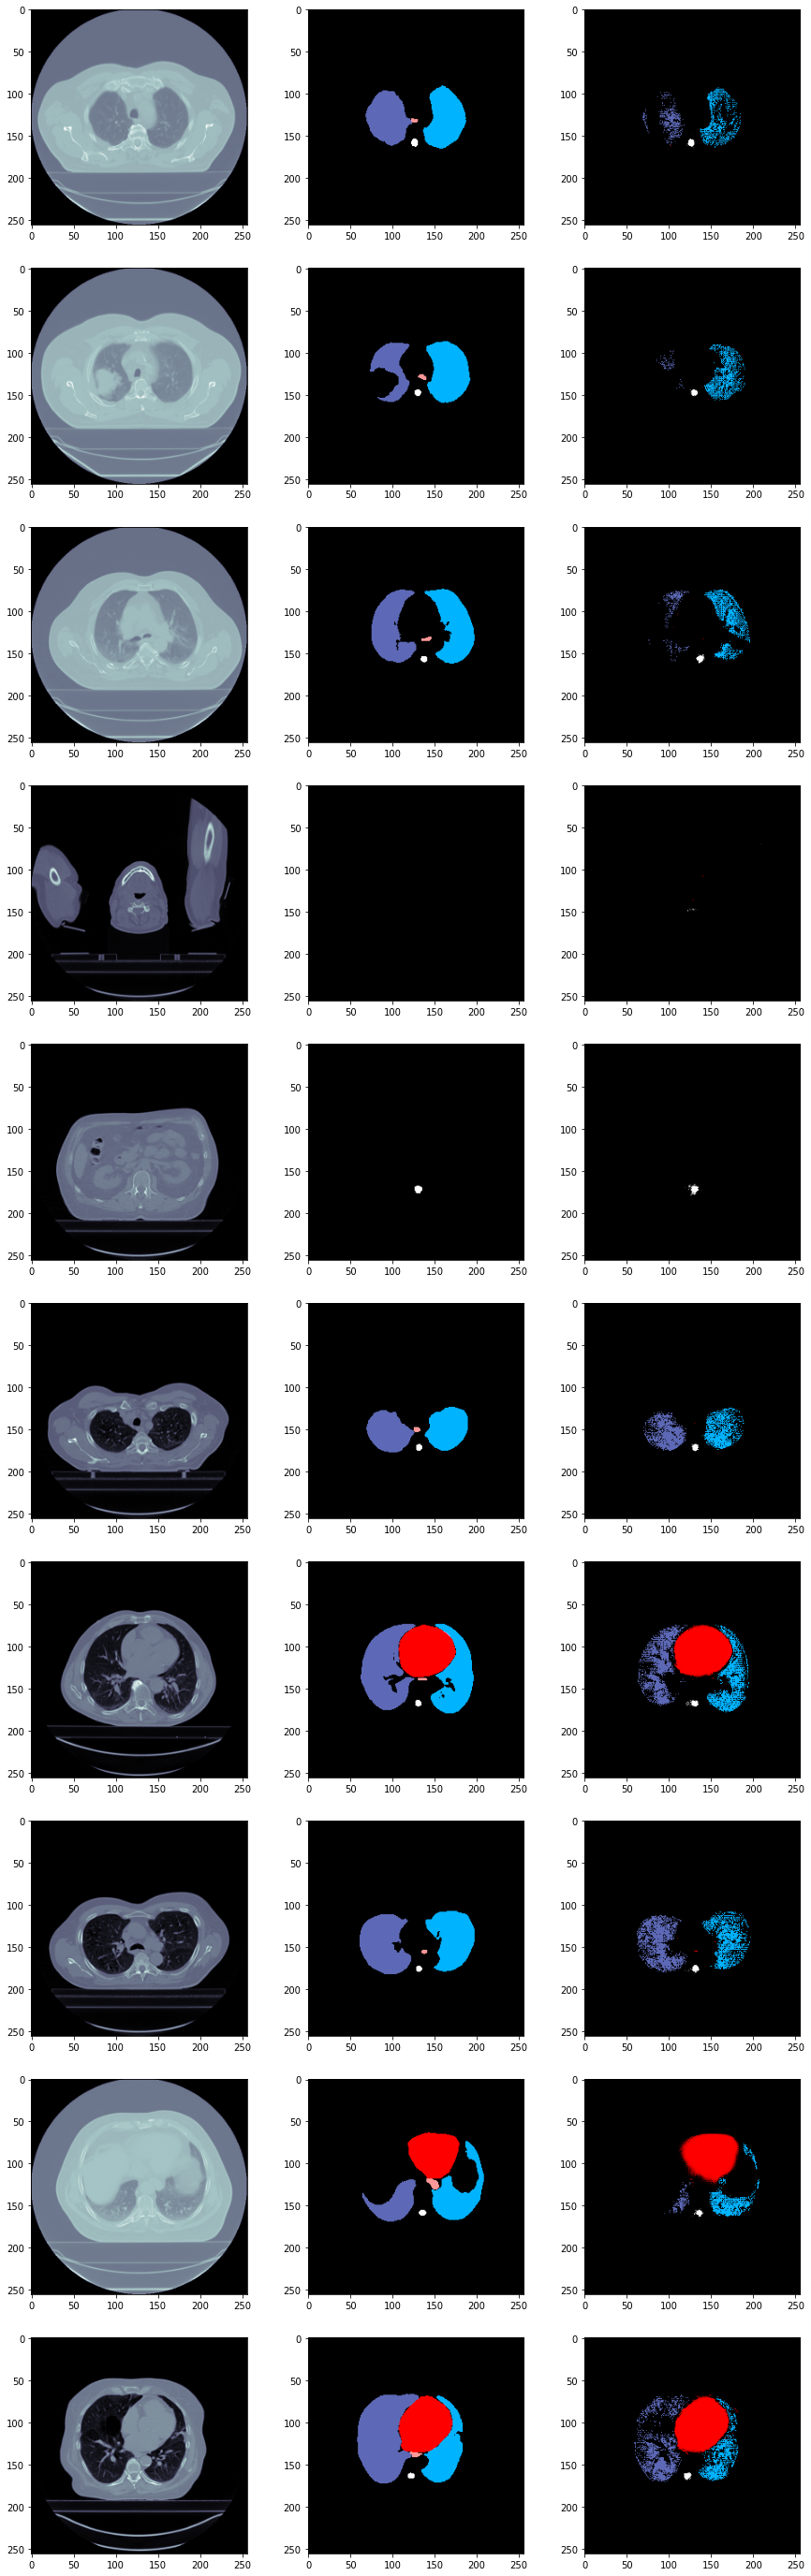

In [11]:
show_imgs(10, x_test[10:30], y_test[10:30], preds_test[10:30])